In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_csv('star_classification.csv')
df["class"].unique()
df = df[0:20000]
x = df.drop('class', axis=1)
x = x.drop("obj_ID", axis=1)
x = x.drop("spec_obj_ID", axis=1)
x = x.drop("run_ID", axis=1)
x = x.drop("rerun_ID", axis=1)
x = x.drop("cam_col", axis=1)
y = df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

classes = {'GALAXY':0, 'QSO':1, 'STAR':2 }
print(y.unique())
x





['GALAXY' 'QSO' 'STAR']


,alpha,delta,u,g,r,i,z,field_ID,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,116.742115,42.269971,22.84368,22.29973,20.75661,19.95866,19.47037,70,0.476464,3666,55185,973
19996,118.188167,44.085136,25.64453,22.74920,20.78390,19.89102,19.35816,84,0.501545,6376,56269,695
19997,123.109994,58.186645,19.60161,19.41832,19.41733,19.13950,19.05412,155,1.854104,1873,54437,316
19998,359.461825,28.348221,19.39042,17.85960,17.23222,16.95590,16.89005,103,0.000079,2803,54368,396


In [37]:
def transformYtoNum(y):
    # Transforms String classes to integers
    y_new = np.zeros((len(y)))
    for i in range(len(y)):
        y_new[i] = classes.get(y[i])

    return y_new

def one_hot_encoding(y):
    
    y_new = []
    for i in range(len(y)):
        y_new.append([1 if y[i] == j else 0 for j in range(3)])
    return np.array(y_new)

In [38]:
# Converting pd frames to numpy arrays
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()
print(type(y_train))

<class 'numpy.ndarray'>


Normalizing values and transforming String classes to Numbers

In [39]:

y_train_transformed = transformYtoNum(y_train)
y_test_transformed = transformYtoNum(y_test)
y_train_onehot = one_hot_encoding(y_train_transformed)
# Using StandardScaler for decimal values with many digits so OVERFLOW in calculations is prevented
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)
print("Before scaler:\n", x_train)
print("After scaler:\n", x_train_scaler)

Before scaler:
 [[ 1.69683592e+02 -2.08234967e+00  2.45212200e+01 ...  3.77400000e+03
   5.52440000e+04  4.76000000e+02]
 [ 8.86939651e+00 -1.14569542e+00  2.48811000e+01 ...  7.86700000e+03
   5.70030000e+04  9.57000000e+02]
 [ 1.34287502e+02  1.09339668e+01  2.01741600e+01 ...  2.67100000e+03
   5.41410000e+04  6.30000000e+02]
 ...
 [ 1.48137883e+02  9.84109050e-01  1.79404800e+01 ...  2.67000000e+02
   5.16080000e+04  5.34000000e+02]
 [ 5.58294316e+01  9.76439658e+00  1.77922400e+01 ...  2.67900000e+03
   5.43680000e+04  2.87000000e+02]
 [ 1.89902619e+02  3.37795907e+01  2.49314200e+01 ...  3.97100000e+03
   5.53220000e+04  4.50000000e+02]]
After scaler:
 [[-0.08300705 -1.29521763  1.09045971 ... -0.43992811 -0.16558138
   0.10628772]
 [-1.69235606 -1.24618879  1.25025044 ...  0.94950427  0.80190371
   1.90063875]
 [-0.43723363 -0.6138831  -0.83968341 ... -0.81435858 -0.77225339
   0.68077849]
 ...
 [-0.29862586 -1.13470492 -1.83146224 ... -1.6304337  -2.16545392
   0.32265437]
 [-1

<h4>Least Squares method with Gradient Descent</h4><br>
1. Add Bias term to the training and test data <br>
2. For each iteration calculate the total <b>Square Loss</b><br>
3. Compute Gradient from the derivative of Square loss<br>
4. Update Weights based on the calculated gradient<br>

In [67]:



# Add a bias term to the features
x_train_scaler = np.hstack((np.ones((x_train_scaler.shape[0], 1)), x_train_scaler))
x_test_scaler = np.hstack((np.ones((x_test_scaler.shape[0], 1)), x_test_scaler))

# Gradient descent function 
def gradient_descent(x_train, y_train, learning_rate=0.01, iter=1000):
    square_loss_history = []
    n_samples, n_features = x_train.shape
    W = np.zeros((n_features, y_train.shape[1]))  # Initialize weights with zeros
    

    for iteration in range(iter):
        # Compute predictions
        predictions = np.dot(x_train,W)
        

        square_loss_history.append((1 / (2*n_samples)) * np.sum((y_train-predictions)**2))

        # Compute gradient
        gradient = -(np.dot(x_train.T, (y_train-predictions))) / n_samples
        # Update weights
        W -= learning_rate * gradient

    #print(predictions[0:3])
    return W, square_loss_history

# Fit model using Least Squares for Loss Function and Gradient Descent
W, sq_loss_history = gradient_descent(x_train_scaler, y_train_onehot, learning_rate=0.01, iter=1000)


Y_pred_test = np.dot(x_test_scaler, W)

# choose the class with the highest score
y_pred_test = np.argmax(Y_pred_test, axis=1)


accuracy = accuracy_score(y_test_transformed, y_pred_test)

print("Accuracy:", accuracy)


Accuracy: 0.8335


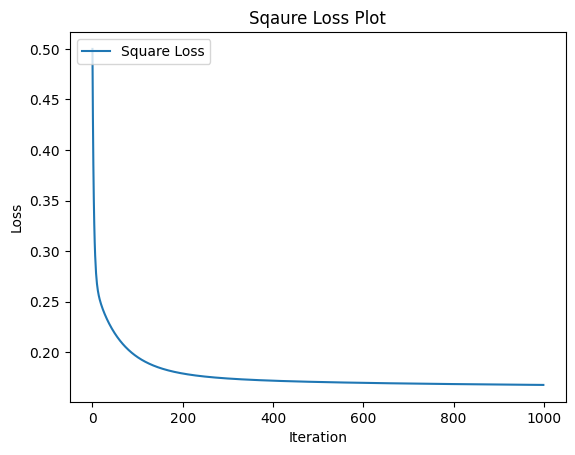

In [68]:
plt.plot( sq_loss_history)
#plt.plot( accuracy_history)
plt.title('Sqaure Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['Square Loss'], loc='upper left')
plt.show()